In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree

crime_data = pd.read_csv("https://media.githubusercontent.com/media/manavjatakia/dataset/master/CrimeData.csv", header = 0)
#print(crime_data)
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [3]:
#Data Cleaning Process
#Importing cleaning function from Python File
from Week6 import clean_one

#1. Check for NA Values in each columns
clean_one(crime_data)

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            97865
Vict Age               0
Vict Sex           93225
Vict Descent       93231
Premis Cd              8
Premis Desc          391
Weapon Used Cd    465221
Weapon Desc       465221
Status                 0
Status Desc            0
Crm Cd 1               8
Crm Cd 2          659795
Crm Cd 3          711034
Crm Cd 4          712760
LOCATION               0
Cross Street      597534
LAT                    0
LON                    0
dtype: int64

In [7]:
#Importing cleaning function from Python File
from Week6 import clean_two

#2. Cleaning column names
crime_data.columns = clean_two(crime_data)

In [8]:
#Replacing NA values in columns which will be used
#3. Changing Values in Gender Column
crime_data['vict_sex'].replace([np.nan], 'O', inplace=True)
crime_data['vict_sex'] = np.where(np.isin(crime_data['vict_sex'], ["H", "X"]), "O", crime_data['vict_sex'])

#4. Check of NA Value after cleaning
clean_one(crime_data)

dr_no                  0
date_rptd              0
date_occ               0
time_occ               0
area                   0
area_name              0
rpt_dist_no            0
part_1-2               0
crm_cd                 0
crm_cd_desc            0
mocodes            97865
vict_age               0
vict_sex               0
vict_descent       93231
premis_cd              8
premis_desc          391
weapon_used_cd    465221
weapon_desc       465221
status                 0
status_desc            0
crm_cd_1               8
crm_cd_2          659795
crm_cd_3          711034
crm_cd_4          712760
location               0
cross_street      597534
lat                    0
lon                    0
dtype: int64

In [9]:
#Importing descriptive function from Python File
from Week6 import descriptive

#Descriptive Statistics about the data
descriptive(crime_data)

              dr_no       time_occ           area    rpt_dist_no  \
count  7.128140e+05  712814.000000  712814.000000  712814.000000   
mean   2.138685e+08    1334.216531      10.711677    1117.562374   
std    9.796752e+06     654.046353       6.089724     608.980587   
min    8.170000e+02       1.000000       1.000000     101.000000   
25%    2.020103e+08     900.000000       6.000000     622.000000   
50%    2.117074e+08    1415.000000      11.000000    1141.000000   
75%    2.212195e+08    1900.000000      16.000000    1617.000000   
max    2.399097e+08    2359.000000      21.000000    2199.000000   

            part_1-2         crm_cd       vict_age      premis_cd  \
count  712814.000000  712814.000000  712814.000000  712806.000000   
mean        1.416127     500.837608      29.937654     305.556167   
std         0.492915     207.988426      21.706814     216.778511   
min         1.000000     110.000000      -2.000000     101.000000   
25%         1.000000     331.000000      1

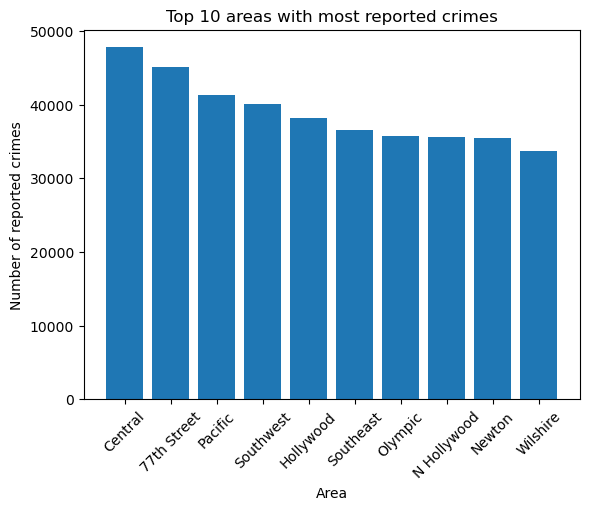

In [10]:
#Graph 1 - Barplot - Top10 Areas with Most Reported Crimes
top_areas = crime_data["area_name"].value_counts().nlargest(10)
plt.bar(top_areas.index, top_areas.values)
plt.title("Top 10 areas with most reported crimes")
plt.xlabel("Area")
plt.ylabel("Number of reported crimes")
plt.xticks(rotation=45)
plt.show()

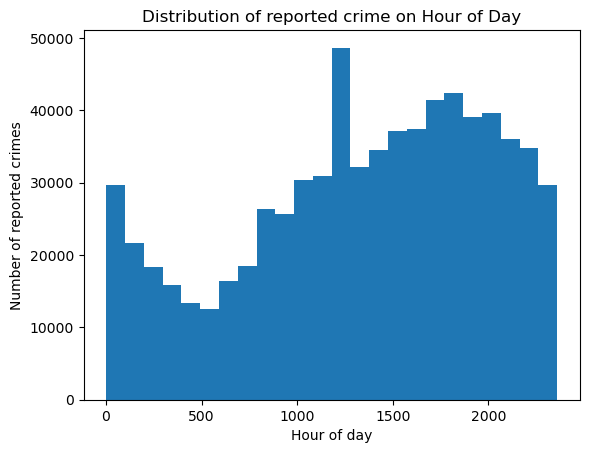

In [11]:
#Graph 2 - Hourly Reported Crime
plt.hist(crime_data["time_occ"], bins=24)
plt.title("Distribution of reported crime on Hour of Day")
plt.xlabel("Hour of day")
plt.ylabel("Number of reported crimes")
plt.show()

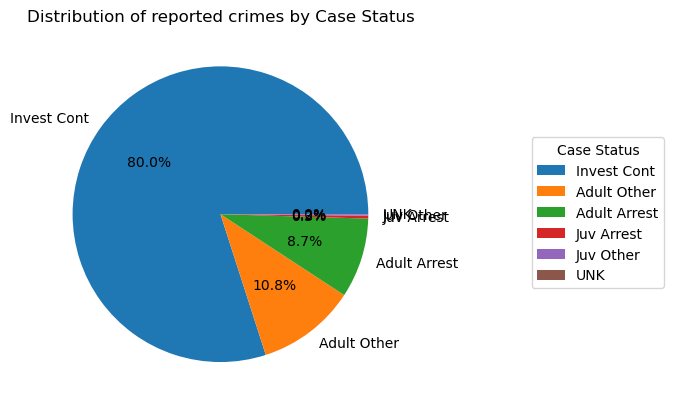

In [12]:
#Graph 3 - Pie Chart Distribution of reported crimes by status
status_counts = crime_data["status_desc"].value_counts()
plt.pie(status_counts.values, labels=status_counts.index, autopct="%1.1f%%")
plt.title("Distribution of reported crimes by Case Status")
#plt.legend(loc="lower right")
plt.legend(title = 'Case Status', bbox_to_anchor=(1.7, 0.3), loc='lower right', borderaxespad=0)
plt.show()

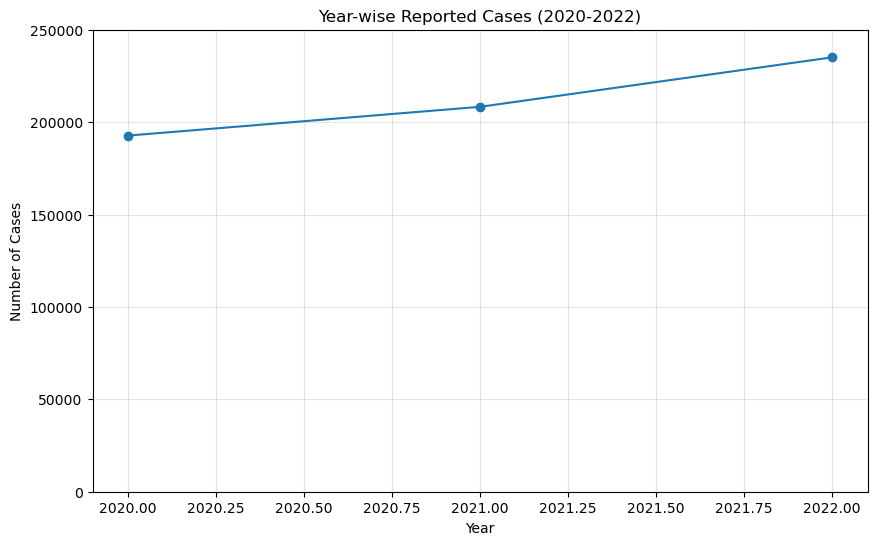

In [13]:
#Graph 4 - Year-wise Reported Cases (2019-2022)
#Convert 'Date Rptd' column to datetime
crime_data['date_rptd'] = pd.to_datetime(crime_data['date_rptd'])

# Extract year from 'Date Rptd' column
crime_data['year'] = crime_data['date_rptd'].dt.year

# Filter data for the years 2019 to 2022
df_filtered = crime_data[crime_data['year'].between(2019, 2022)]

# Group by year and count the number of cases
cases_per_year = df_filtered['year'].value_counts().sort_index()

# Create the graph
plt.figure(figsize=(10, 6))
plt.plot(cases_per_year.index, cases_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Year-wise Reported Cases (2020-2022)')
plt.ylim(0, 250000)  
plt.grid(True, color = 'grey', alpha = 0.2)
plt.show()

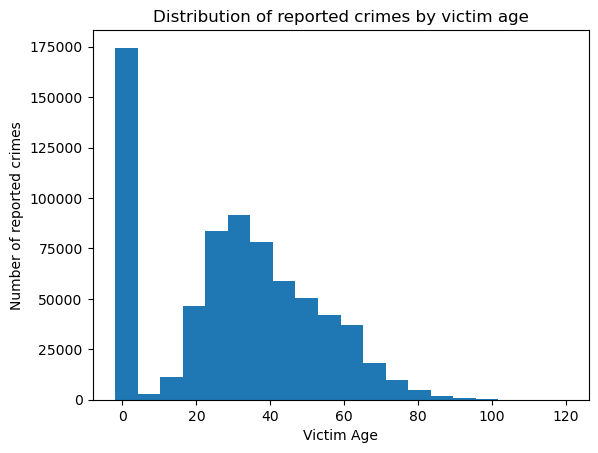

In [14]:
#Graph 5: Distribution of reported crimes by victim age
#Create a bar plot of the distribution of reported crimes by victim age
plt.hist(crime_data["vict_age"], bins=20)
plt.title("Distribution of reported crimes by victim age")
plt.xlabel("Victim Age")
plt.ylabel("Number of reported crimes")
plt.show()

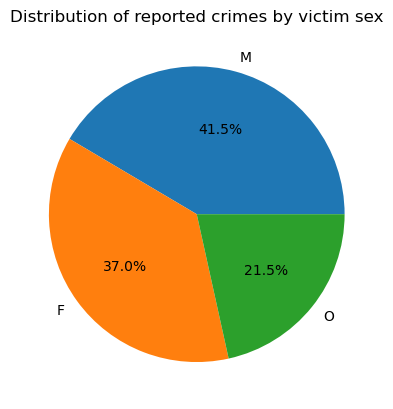

In [15]:
#Graph 6: Distribution of reported crimes by victim sex
#Create a pie chart of the distribution of reported crimes by victim sex
victim_sex_counts = crime_data["vict_sex"].value_counts()
plt.pie(victim_sex_counts.values, labels=victim_sex_counts.index, autopct="%1.1f%%")
plt.title("Distribution of reported crimes by victim sex")
plt.show()

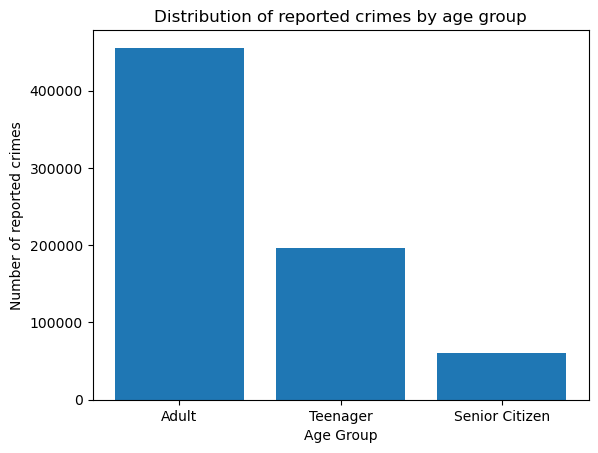

In [16]:
#Graph 7: Distribution of reported crimes by age group
    # Categorize victim age into three groups: teenager, adult, and senior citizen
crime_data["age_group"] = pd.cut(crime_data["vict_age"], bins=[-2, 18, 60, float("inf")], labels=["Teenager", "Adult", "Senior Citizen"])
        
        # Create a bar plot of the distribution of reported crimes by age group
age_group_counts = crime_data["age_group"].value_counts()
plt.bar(age_group_counts.index, age_group_counts.values)
plt.title("Distribution of reported crimes by age group")
plt.xlabel("Age Group")
plt.ylabel("Number of reported crimes")
plt.show()

In [17]:
#Table 1:
# Create age groups
crime_data['age_group'] = pd.cut(crime_data['vict_age'], bins=[-2, 18, 60, float('inf')], labels=['Teenager', 'Adult', 'Senior Citizen'])

# Creating a table
table = pd.pivot_table(crime_data, values='dr_no', index='age_group', columns='vict_sex', aggfunc='count')
percentages = table.div(table.sum(axis=1), axis=0) * 100  # Calculating percentage

# Displaying the percentages table
print(percentages)

vict_sex                F          M          O
age_group                                      
Teenager         8.208238  16.897188  74.894574
Adult           48.343865  50.300816   1.355319
Senior Citizen  44.729835  55.091544   0.178622


<Figure size 1200x600 with 0 Axes>

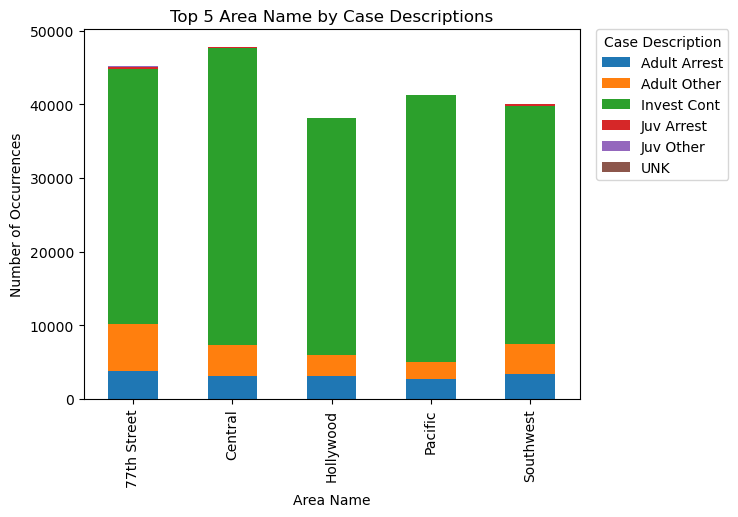

In [18]:
#Graph 8:
# Get the top 5 AREA NAME
top_areas = crime_data["area_name"].value_counts().nlargest(5).index.tolist()
        
# Filter the dataframe for the top 5 AREA NAME
filtered_df = crime_data[crime_data["area_name"].isin(top_areas)]
        
# Count the occurrences of each case description within the top areas
case_desc_counts = filtered_df.groupby("area_name")["status_desc"].value_counts().unstack().fillna(0)
        
# Create a stacked bar plot of the top 5 AREA NAME and their corresponding case descriptions
plt.figure(figsize=(12, 6))
case_desc_counts.plot(kind="bar", stacked=True)
plt.title("Top 5 Area Name by Case Descriptions")
plt.xlabel("Area Name")
plt.ylabel("Number of Occurrences")
plt.legend(title="Case Description", bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)
plt.show()
#CHANGE LEGEND POSITION

In [19]:
#Get the top 5 AREA NAME
top_areas = crime_data["area_name"].value_counts().nlargest(5).index.tolist()

#Filter the dataframe for the top 5 AREA NAME
filtered_df = crime_data[crime_data["area_name"].isin(top_areas)]

#Count the occurrences of each case description within the top areas
case_desc_counts = filtered_df.groupby("area_name")["status_desc"].value_counts().unstack().fillna(0)

#Calculate the percentages
percentages = case_desc_counts.div(case_desc_counts.sum(axis=1), axis=0) * 100

#Create a table of the top 5 AREA NAME by their corresponding percentages of case descriptions
table = percentages.loc[top_areas]

#Printing the table
print(table.to_string(float_format='%.2f', header=True))

status_desc  Adult Arrest  Adult Other  Invest Cont  Juv Arrest  Juv Other  UNK
area_name                                                                      
Central              6.47         8.76        84.63        0.11       0.02 0.00
77th Street          8.37        14.05        76.85        0.50       0.23 0.00
Pacific              6.67         5.65        87.44        0.18       0.07 0.00
Southwest            8.50        10.27        80.63        0.49       0.10 0.00
Hollywood            8.15         7.40        84.17        0.15       0.13 0.00


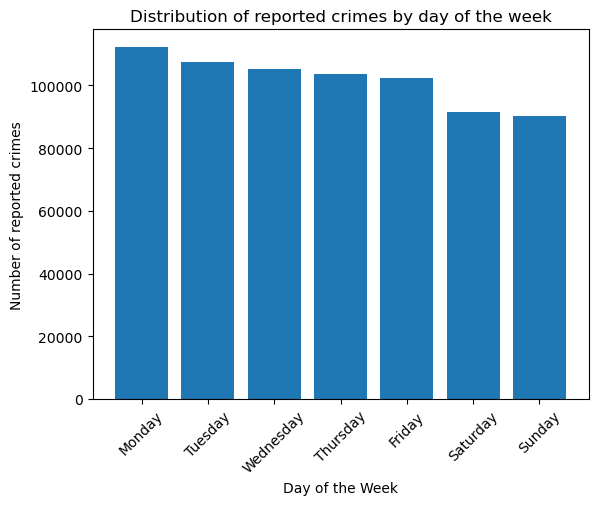

In [20]:
#GRAPH 9: Distribution of reported crimes by day of the week
# Convert 'date_rptd' column to datetime
crime_data['date_rptd'] = pd.to_datetime(crime_data['date_rptd'])
# Extract day of the week from 'date_rptd' column
crime_data['day_of_week'] = crime_data['date_rptd'].dt.day_name()

# Count the occurrences of each day of the week
day_counts = crime_data['day_of_week'].value_counts()

# Create the graph
plt.bar(day_counts.index, day_counts.values)
plt.title('Distribution of reported crimes by day of the week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of reported crimes')
plt.xticks(rotation=45)
plt.show()


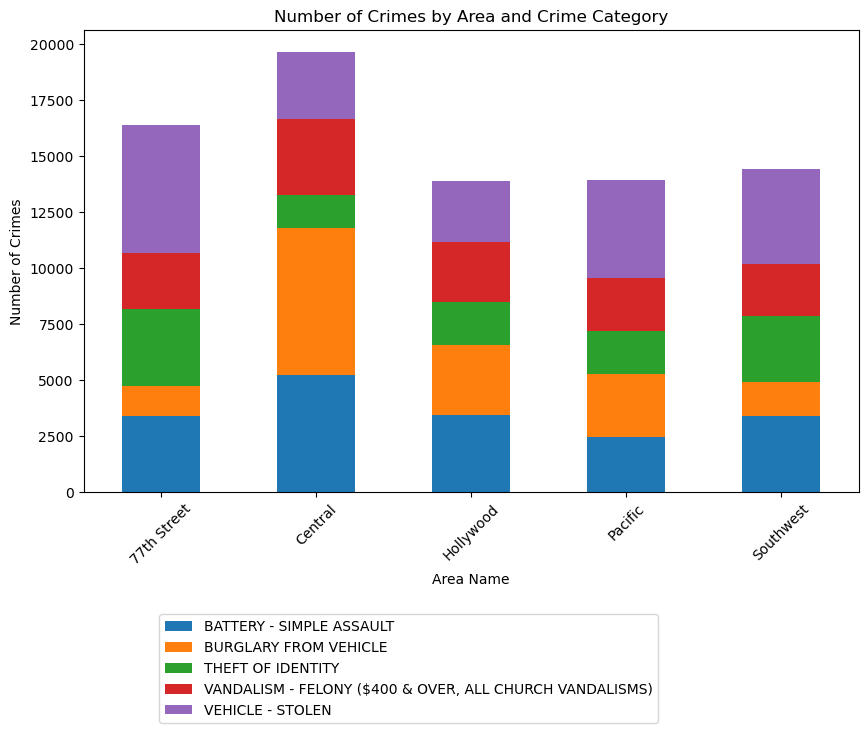

In [21]:
#Graph 10: Number of Crimes by Area and Crime Category
top_areas = crime_data["area_name"].value_counts().nlargest(5).index.tolist()
top_categories = crime_data["crm_cd_desc"].value_counts().nlargest(5).index.tolist()
filtered_data = crime_data[(crime_data["area_name"].isin(top_areas)) & (crime_data["crm_cd_desc"].isin(top_categories))]

grouped_data = filtered_data.groupby(["area_name", "crm_cd_desc"])["crm_cd_desc"].count().unstack()

grouped_data.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Number of Crimes by Area and Crime Category")
plt.xlabel("Area Name")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(.75, -0.25))
plt.show()

/var/folders/34/hnj_qr014nqd3pszt7x_bm980000gn/T/ipykernel_1522/3540121643.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["month"] = filtered_data["date_rptd"].dt.month


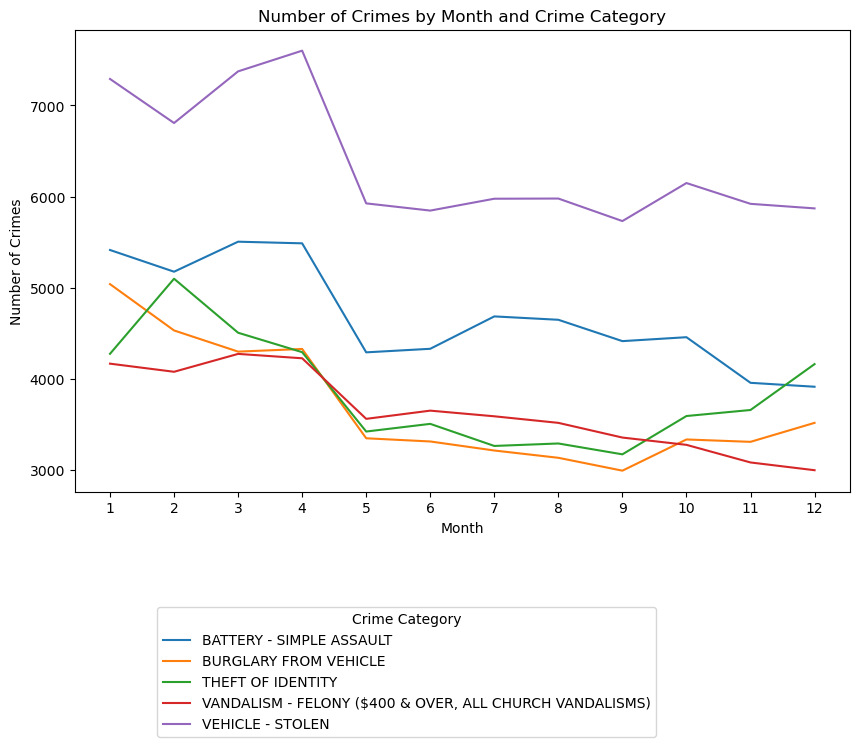

In [22]:
# Convert 'date_rptd' column to datetime
crime_data['date_rptd'] = pd.to_datetime(crime_data['date_rptd'])

# Filter the data for the top crime categories
top_categories = crime_data["crm_cd_desc"].value_counts().nlargest(5).index.tolist()
filtered_data = crime_data[crime_data["crm_cd_desc"].isin(top_categories)]

# Extract the month from the 'date_rptd' column
filtered_data["month"] = filtered_data["date_rptd"].dt.month

# Group the data by month and crime category and count the number of occurrences
grouped_data = filtered_data.groupby(["month", "crm_cd_desc"])["crm_cd_desc"].count().unstack()

# Plot the data
grouped_data.plot(kind="line", figsize=(10,6))
plt.title("Number of Crimes by Month and Crime Category")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(range(1,13))
plt.legend(title="Crime Category", bbox_to_anchor=(.75, -0.25), loc='upper right', borderaxespad=0)
plt.show()


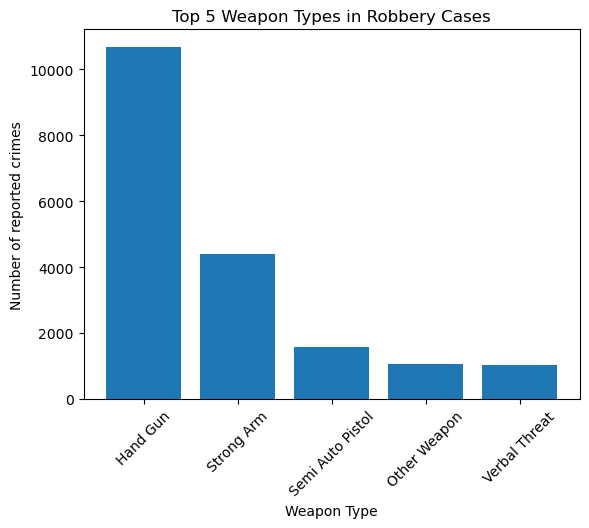

In [23]:
#GRAPH 12:

#Filter the data for robbery cases
robbery_data = crime_data[crime_data['crm_cd_desc'] == 'ROBBERY']

#Count the occurrences of each weapon type in robbery cases
weapon_type_counts = robbery_data['weapon_desc'].value_counts().nlargest(5)

#Create the graph
abbreviations = ['Hand Gun', 'Strong Arm', 'Semi Auto Pistol', 'Other Weapon', 'Verbal Threat'] 
plt.bar(abbreviations, weapon_type_counts.values)
plt.title('Top 5 Weapon Types in Robbery Cases')
plt.xlabel('Weapon Type')
plt.ylabel('Number of reported crimes')
plt.xticks(rotation=45)
plt.show()

In [24]:
new_data = crime_data.copy()

In [25]:
#Data cleaning on subset
new_data['weapon_used_cd'].replace([np.nan], '0', inplace=True)
new_data['premis_cd'].replace([np.nan], '0', inplace=True)
new_data.isna().sum()

dr_no                  0
date_rptd              0
date_occ               0
time_occ               0
area                   0
area_name              0
rpt_dist_no            0
part_1-2               0
crm_cd                 0
crm_cd_desc            0
mocodes            97865
vict_age               0
vict_sex               0
vict_descent       93231
premis_cd              0
premis_desc          391
weapon_used_cd         0
weapon_desc       465221
status                 0
status_desc            0
crm_cd_1               8
crm_cd_2          659795
crm_cd_3          711034
crm_cd_4          712760
location               0
cross_street      597534
lat                    0
lon                    0
year                   0
age_group              8
day_of_week            0
dtype: int64

In [26]:
#Data Cleaning for subset for Predictive Model
new_data['status_desc'] = np.where(np.isin(new_data['status_desc'], ["Adult Arrest", "Juv Arrest", "Adult Other", "Juv Other"]), "Solved", new_data['status_desc'])
new_data['status_desc'].replace('Invest Cont', 'Ongoing', inplace=True)

In [28]:
#Converting the column into binary
new_data['status_desc'].replace('Solved', '1', inplace=True)
new_data['status_desc'].replace('Ongoing', '0', inplace=True)
new_data.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon,year,age_group,day_of_week
0,10304468,2020-01-08,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,2020,Adult,Wednesday
1,190101086,2020-01-02,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,2020,Adult,Thursday
2,200110444,2020-04-14,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,2020,Teenager,Tuesday
3,191501505,2020-01-01,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,2020,Senior Citizen,Wednesday
4,191921269,2020-01-01,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,2020,Adult,Wednesday


In [30]:
#Filtered 0 and 1 values from Status Description Column
status = ['0', '1']
new_data = new_data[new_data['status_desc'].isin(status)]
new_data.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon,year,age_group,day_of_week
0,10304468,2020-01-08,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,2020,Adult,Wednesday
1,190101086,2020-01-02,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,2020,Adult,Thursday
2,200110444,2020-04-14,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,2020,Teenager,Tuesday
3,191501505,2020-01-01,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,2020,Senior Citizen,Wednesday
4,191921269,2020-01-01,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,2020,Adult,Wednesday


In [31]:
# Selecting predictor variables and target variable
x = new_data[['vict_age', 'weapon_used_cd', 'crm_cd', 'premis_cd', 'vict_sex', 'area']]  # Example predictor variables
y = new_data["status_desc"]  # Example target variable

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
x_train = pd.get_dummies(x_train, columns=['vict_sex'])
x_train

,vict_age,weapon_used_cd,crm_cd,premis_cd,area,vict_sex_F,vict_sex_M,vict_sex_O
639638,71,0,310,501.0,17,0,1,0
544609,0,0,310,210.0,17,0,0,1
127663,28,0,330,108.0,14,0,1,0
144564,61,0,354,502.0,8,1,0,0
667850,34,0,354,501.0,12,1,0,0
...,...,...,...,...,...,...,...,...
259178,45,0,330,707.0,10,0,1,0
365838,37,400.0,626,504.0,4,0,1,0
131932,0,0,420,101.0,14,0,0,1
671157,73,0,946,101.0,8,1,0,0


In [33]:
x_test = pd.get_dummies(x_test, columns=['vict_sex'])
x_test

,vict_age,weapon_used_cd,crm_cd,premis_cd,area,vict_sex_F,vict_sex_M,vict_sex_O
583213,47,101.0,210,502.0,1,0,1,0
631773,28,0,740,122.0,13,0,1,0
555598,0,0,510,707.0,8,0,0,1
699298,33,102.0,230,102.0,18,1,0,0
273454,38,400.0,821,158.0,13,1,0,0
...,...,...,...,...,...,...,...,...
528486,0,0,510,101.0,17,0,0,1
177708,0,0,740,401.0,12,0,0,1
559913,0,0,510,108.0,4,0,0,1
49953,0,0,310,729.0,4,0,1,0


In [34]:
logreg = LogisticRegression()

In [35]:
#Logistic Regression Model
logreg.fit(x_train, y_train)

/Users/manavjatakia/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
#Creating y_prediction
prediction = logreg.predict(x_test)
prediction 

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [37]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88    113984
           1       0.47      0.14      0.22     28579

    accuracy                           0.80    142563
   macro avg       0.64      0.55      0.55    142563
weighted avg       0.75      0.80      0.75    142563



In [38]:
#Decision Tree Model
dt = DecisionTreeClassifier(criterion='entropy')

In [39]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [40]:
pred = dt.predict(x_test)

In [41]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88    113984
           1       0.51      0.42      0.46     28579

    accuracy                           0.80    142563
   macro avg       0.69      0.66      0.67    142563
weighted avg       0.79      0.80      0.80    142563

